(visualization:matplotlib:maps)=
# Maps

There exist several Python modules to plot maps with Matplotlib. Here we cover [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [Mplleaflet](https://github.com/jwass/mplleaflet). Cartopy is good for schematic maps and supports different coordinate and mapping systems. Mplleaflet combines Matplotlib drawings with interactive maps based on [OpenStreetMap](https://www.openstreetmap.org) data.

In a separate chapter we'll meet [Folium](https://python-visualization.github.io/folium/) allowing for more advanced interactive maps.

## Cartopy Basics

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

The letters `crs` are the abbreviation of *coordinate reference system*. Cartopys `crs` module handles all coordinate transforms. In particular, it tells Matplotlib how to transform geographical coordinates to screen coordinates.

Creating a map requires only few steps:

* create a Matplotlib figure,
* create a [`GeoAxes`](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) object,
* add content to the map.

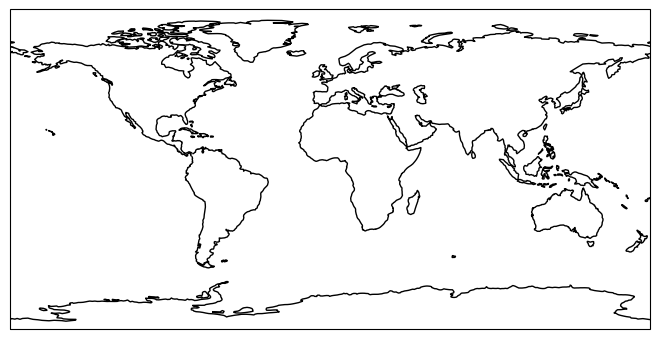

In [2]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1), projection=ccrs.PlateCarree())

ax.coastlines()

plt.show()

`ax` is a Cartopy `GeoAxes` object, because the `projection` is a Cartopy projection. There are many different projection types available, see [Cartopy projection list](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html). Note that `GeoAxes` is derived from the usual Matplotlib `Axes` and thus provides very similar functionality.

Most projection types take arguments for specifing map center and some parameters. To get a map of a smaller geographic region use [`GeoAxes.set_extent`](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent). Detail level of coastlines can be controlled with `resolution` argument, which has to be `110m` (default), `50m` or `10m`. Here is a map of Germany:

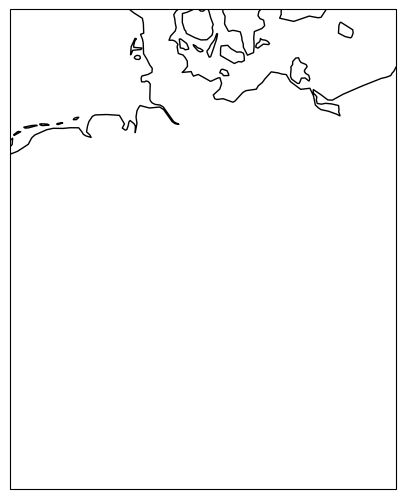

In [3]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1), projection=ccrs.Orthographic(10.5, 51.25))
ax.set_extent([5.5, 15.5, 47, 55.5])

ax.coastlines(resolution='50m')

plt.show()

## Adding more Content

Cartopy gets its data from [Natural Earth](https://www.naturalearthdata.com), which provides public domain map data. But other sources can be used, too. Map data is downloaded by Cartopy as needed and then reused if needed again. To add Natural Earth content to a map call [`GeoAxes.add_feature`](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.add_feature).

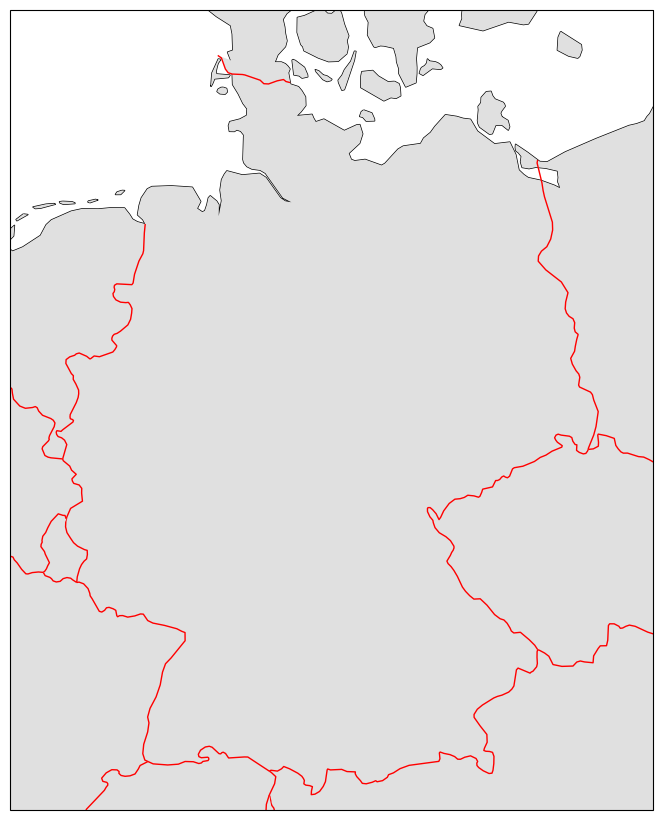

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes((0, 0, 1, 1), projection=ccrs.Orthographic(10.5, 51.25))
ax.set_extent([5.5, 15.5, 47, 55.5])

ax.coastlines(resolution='50m')

ax.add_feature(
    cfeature.NaturalEarthFeature(
        name='land',
        scale='50m',
        category='physical'
    ),
    facecolor='#e0e0e0'
)
ax.add_feature(
    cfeature.NaturalEarthFeature(
        name='admin_0_boundary_lines_land',
        scale='50m',
        category='cultural'
    ),
    edgecolor='r',
    facecolor='#e0e0e0'
)

plt.show()

Available options for the `name` argument can be guessed from the [download section of Natural Earth](https://www.naturalearthdata.com/downloads). Look at the filenames in the download links. Arguments other than `name`, `resolution` and `category` are passed on to Matplotlib.

## Plotting onto the Map

All Matplotlib plotting functions are available for extending the map. Coordinates can be provided with respect to arbitrary cartographic projections, if the correct transform is chosen. If latitude, longitude values are used, `PlateCarree` is the right choice. For all other projection types coordinates have to be provided in meters.

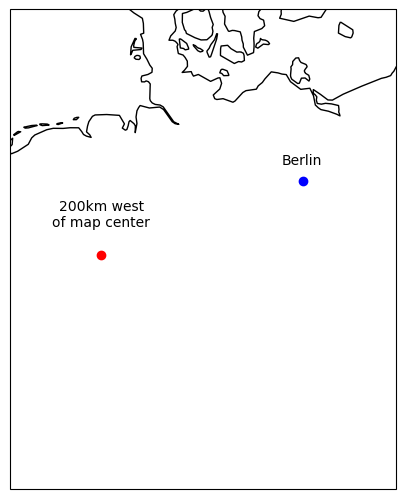

In [5]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1), projection=ccrs.Orthographic(10.5, 51.25))
ax.set_extent([5.5, 15.5, 47, 55.5])

ax.coastlines(resolution='50m')

ax.plot(13.404, 52.518, 'ob', transform=ccrs.PlateCarree())
ax.text(13.404, 52.9, 'Berlin', ha='center', va='center', transform=ccrs.PlateCarree())

ax.plot(-200000, 0, 'or', transform=ccrs.Orthographic(10.5, 51.25))
ax.text(-200000, 80000, '200km west\nof map center', ha='center', va='center',
        transform=ccrs.Orthographic(10.5, 51.25))

plt.show()

Take care: On Cartopy maps `plot` does not connect two points by a straight line, but by the shortest path with respect to the chosen coordinate system.

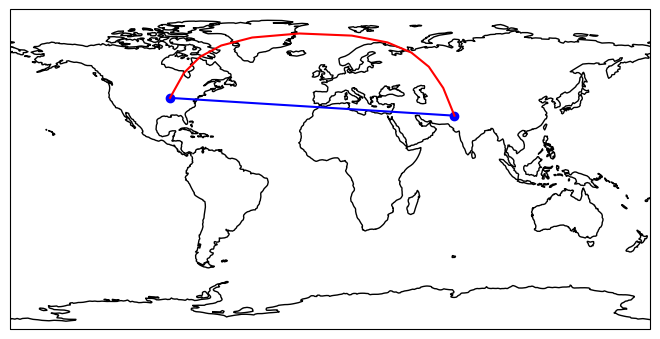

In [6]:
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1), projection=ccrs.PlateCarree())

ax.coastlines()

lat1 = 40
lon1 = -90
lat2 = 30
lon2 = 70

ax.plot([lon1, lon2], [lat1, lat2], '-ob', transform=ccrs.PlateCarree())
ax.plot([lon1, lon2], [lat1, lat2], '-r', transform=ccrs.Geodetic())

ax.set_global()

plt.show()

When plotting Matplotlib adjusts axes limits to the plotted objects. With [`GeoAxes.set_global`](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) we reset limits to show the whole map.

## Interactive Maps with Mplleaflet

In [7]:
import matplotlib.pyplot as plt
import mplleaflet

The Python library Mplleaflet allows to show Matplotlib drawings on an interactive map based on [OpenStreetMap](https://www.osm.org) or other map services. The result is a webpage, which can be embedded into an Jupyter notebook.

Use longitude and latitude values for plotting and then call `mplleaflet.display` to show the map inside the Jupyter notebook. Alternatively, call `mplleaflet.show` to open the map in new window.

```{hint}
Mplleaflet seems to be unmaintained for several years, resulting in broken compatibility with Matplotlib (Matplotlib changed some variable names). Thus, usage of Mplleaflet may require some tweaking of Matplotlib variable names. See [GitHub issue](https://github.com/jwass/mplleaflet/issues/80) and this [solution](https://github.com/plotly/plotly.py/issues/2913#issuecomment-730619757).
```

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes((0, 0, 1, 1))

ax.plot([12, 13, 13, 12, 12], [51, 51, 50, 50, 51], '-ob')

# some Mplleaflet patching
ax.xaxis._gridOnMajor = ax.xaxis._major_tick_kw['gridOn']
ax.yaxis._gridOnMajor = ax.yaxis._major_tick_kw['gridOn']

mplleaflet.display(fig=fig)

/home/jef19jdw/anaconda3/envs/ds_book/lib/python3.10/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
